In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.ticker as ticker

import seaborn as sns
df=pd.read_csv('south_africa_training_set.csv')
pd.set_option('display.max_columns',85)

In [2]:
df.head()

,Unnamed: 0,target,hashed_user_id,regist_date,is_bind_card,lastorder_usecase,lastorder_platform,lastorder_orderdate,subtotal_amount_today_daily,subtotal_amount_recent_7days,subtotal_amount_recent_30days,subtotal_ordercount_today_daily,subtotal_ordercount_recent_7days,subtotal_ordercount_recent_30days,nr_interactions,nr_days_interacted,max_date_time,nr_unique_pages_visited,search_events,unique_search_terms,unique_app_visits,unique_app_category_visits,year_month
0,0,active,-1000772633524872632,2022-12-30,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,15,1,2022-12-30,6,0,0,2,1,202212
1,1,inactive,-1000772633524872632,2022-12-30,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,11,2,2023-01-20,2,0,0,2,1,202301
2,2,inactive,-1006559301419582051,2022-08-15,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,4,1,2022-12-06,2,0,0,1,0,202212
3,3,inactive,-1006671521575354929,2023-01-03,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,35,1,2023-01-03,17,0,0,3,2,202301
4,4,inactive,-1008193142447905044,2021-10-16,1,-1,-1,NaN,0.0,0.0,0.0,0,0,0,158,3,2022-11-21,12,0,0,7,5,202211


In [3]:
df.groupby('target')['unique_app_visits'].value_counts(bins=8,normalize=True)*100



target    unique_app_visits
active    (-0.089, 11.0]       98.170577
          (11.0, 22.0]          1.667654
          (22.0, 33.0]          0.127701
          (33.0, 44.0]          0.024054
          (44.0, 55.0]          0.006504
          (55.0, 66.0]          0.002271
          (66.0, 77.0]          0.001032
          (77.0, 88.0]          0.000206
inactive  (-0.091, 11.25]      99.247083
          (11.25, 22.5]         0.691398
          (22.5, 33.75]         0.048355
          (33.75, 45.0]         0.008945
          (45.0, 56.25]         0.002447
          (56.25, 67.5]         0.001181
          (67.5, 78.75]         0.000422
          (78.75, 90.0]         0.000169
Name: proportion, dtype: float64

### Last Order UseCase

#### Stats

Looking at the below stats you can visibly see that the percentage of the last order of active users  on mobile is double as compared to the users who are inactive 

In [4]:
df.groupby('target')['lastorder_usecase'].value_counts(normalize=True)*100


target    lastorder_usecase
active    -1                   62.261463
          MOBILE               35.074871
          MINI-PROGRAM          1.107813
          PPU                   0.788095
          DSTV                  0.494701
          EASYPAY               0.241673
          CSB                   0.029422
          BOXOFFICE             0.001961
inactive  -1                   80.984638
          MOBILE               17.843616
          MINI-PROGRAM          0.578236
          PPU                   0.279244
          DSTV                  0.190635
          EASYPAY               0.103799
          CSB                   0.019325
          BOXOFFICE             0.000506
Name: proportion, dtype: float64

#### Graph

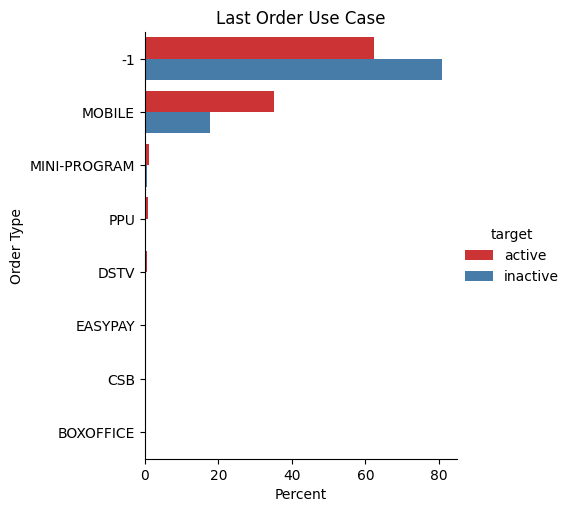

In [5]:

x,y = 'target', 'lastorder_usecase'
ax = sns.catplot,'data',
(df

.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((ax), x='percent',y=y,hue=x,kind='bar',palette='Set1')
.set(title='Last Order Use Case', xlabel='Percent', ylabel='Order Type'))


# Data Cleaning

In [6]:
#Change Date from Object to DateTime
df['max_date_time']=pd.to_datetime(df['max_date_time'])
df['regist_date']=pd.to_datetime(df['regist_date'])
df['lastorder_orderdate']=pd.to_datetime(df['lastorder_orderdate'])


In [7]:
df['regist_date']

0         2022-12-30
1         2022-12-30
2         2022-08-15
3         2023-01-03
4         2021-10-16
             ...    
2153652   2022-08-15
2153653   2022-08-15
2153654   2022-08-15
2153655   2022-08-15
2153656   2022-12-18
Name: regist_date, Length: 2153657, dtype: datetime64[ns]

In [8]:
#create column month in df to see activity visuals where needed
df['lastorder_month']=df['lastorder_orderdate'].dt.to_period('M')

In [9]:
df.query('year_month <202301')\
.groupby('target')['lastorder_month'].value_counts(normalize=True)*100


target    lastorder_month
active    2022-11            36.064569
          2022-12            34.489456
          2022-10            26.655743
          2022-09             2.790232
inactive  2022-12            44.747424
          2022-11            37.803468
          2022-10            14.385524
          2022-09             3.063584
Name: proportion, dtype: float64

In [10]:
(df
.groupby('target')['lastorder_orderdate']

.value_counts(normalize=True)

)

target    lastorder_orderdate
active    2022-11-30             0.089476
          2022-12-31             0.085433
          2022-10-31             0.068538
          2022-11-29             0.042217
          2022-12-30             0.040554
                                   ...   
inactive  2022-09-24             0.000191
          2022-09-25             0.000173
          2022-09-17             0.000164
          2022-09-18             0.000151
          2022-09-19             0.000133
Name: proportion, Length: 245, dtype: float64

In [11]:
#Check the number of columns with no values
nan_count = df.isna().sum()
print(nan_count )

Unnamed: 0                                 0
target                                     0
hashed_user_id                             0
regist_date                                0
is_bind_card                               0
lastorder_usecase                          8
lastorder_platform                         0
lastorder_orderdate                  1562760
subtotal_amount_today_daily                0
subtotal_amount_recent_7days               0
subtotal_amount_recent_30days              0
subtotal_ordercount_today_daily            0
subtotal_ordercount_recent_7days           0
subtotal_ordercount_recent_30days          0
nr_interactions                            0
nr_days_interacted                         0
max_date_time                              0
nr_unique_pages_visited                    0
search_events                              0
unique_search_terms                        0
unique_app_visits                          0
unique_app_category_visits                 0
year_month

In [12]:
#create column month in df to see activity visuals where needed
df['regist_month']=df['regist_date'].dt.to_period('M')

In [13]:
#Dropping Columns that won't be used
df=df.drop(['Unnamed: 0'],axis=1)


In [14]:
df.head(20)

,target,hashed_user_id,regist_date,is_bind_card,lastorder_usecase,lastorder_platform,lastorder_orderdate,subtotal_amount_today_daily,subtotal_amount_recent_7days,subtotal_amount_recent_30days,subtotal_ordercount_today_daily,subtotal_ordercount_recent_7days,subtotal_ordercount_recent_30days,nr_interactions,nr_days_interacted,max_date_time,nr_unique_pages_visited,search_events,unique_search_terms,unique_app_visits,unique_app_category_visits,year_month,lastorder_month,regist_month
0,active,-1000772633524872632,2022-12-30,0,-1,-1,NaT,0.0,0.0,0.0,0,0,0,15,1,2022-12-30,6,0,0,2,1,202212,NaT,2022-12
1,inactive,-1000772633524872632,2022-12-30,0,-1,-1,NaT,0.0,0.0,0.0,0,0,0,11,2,2023-01-20,2,0,0,2,1,202301,NaT,2022-12
2,inactive,-1006559301419582051,2022-08-15,0,-1,-1,NaT,0.0,0.0,0.0,0,0,0,4,1,2022-12-06,2,0,0,1,0,202212,NaT,2022-08
3,inactive,-1006671521575354929,2023-01-03,0,-1,-1,NaT,0.0,0.0,0.0,0,0,0,35,1,2023-01-03,17,0,0,3,2,202301,NaT,2023-01
4,inactive,-1008193142447905044,2021-10-16,1,-1,-1,NaT,0.0,0.0,0.0,0,0,0,158,3,2022-11-21,12,0,0,7,5,202211,NaT,2021-10
5,inactive,-1008849587519297040,2022-12-18,0,-1,-1,NaT,0.0,0.0,0.0,0,0,0,11,1,2022-12-18,4,0,0,2,2,202212,NaT,2022-12
6,active,-1020500780636001202,2022-04-07,1,MOBILE,electrum,2022-10-19,0.0,0.0,41.0,0,0,2,393,17,2022-10-24,20,0,0,4,2,202210,2022-10,2022-04
7,active,-1020500780636001202,2022-04-07,1,MOBILE,electrum,2022-11-29,0.0,11.0,66.0,0,2,3,391,15,2022-11-30,20,0,0,5,3,202211,2022-11,2022-04
8,active,-1020500780636001202,2022-04-07,1,MOBILE,electrum,2022-12-18,0.0,0.0,12.0,0,0,1,241,12,2022-12-25,17,0,0,3,2,202212,2022-12,2022-04
9,inactive,-1020500780636001202,2022-04-07,1,MOBILE,electrum,2022-12-18,0.0,0.0,0.0,0,0,0,86,5,2023-01-28,11,0,0,2,1,202301,2022-12,2022-04


## Original Data Frame Visuals

### Last Order Graph

#### The graph below is a visualization of what customers have spent on the app in 30 days 

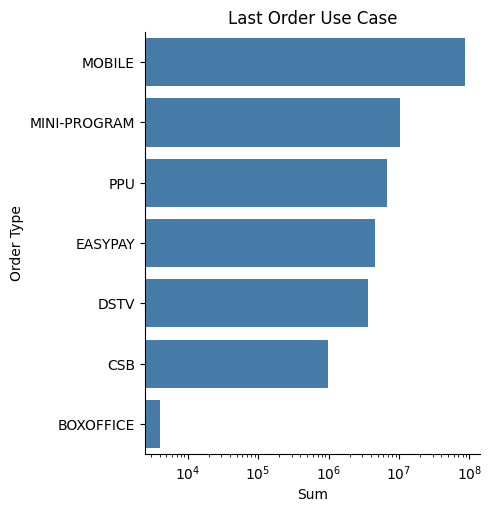

In [15]:
x,y = 'lastorder_usecase', 'subtotal_amount_recent_30days'
ax=sns.catplot,'data'
(df
.query('subtotal_amount_recent_30days>1')
.groupby(x)[y]
.sum()
 .sort_values(ascending=False)
.rename('sum')
.reset_index()
.pipe((ax), x='sum',y=x,kind='bar',log=True,color='#377eb8')
.set(title='Last Order Use Case', xlabel='Sum', ylabel='Order Type'))

### Last Order Date

The below graph is the number of orders on a specific day grouped by a users categorized as active or inactive,normalized and converted into percentage for better visualization.

An interesting trend you can see on the active is that between the 20th and the last day of the month,the activity is high due to the fact that users have have been paid



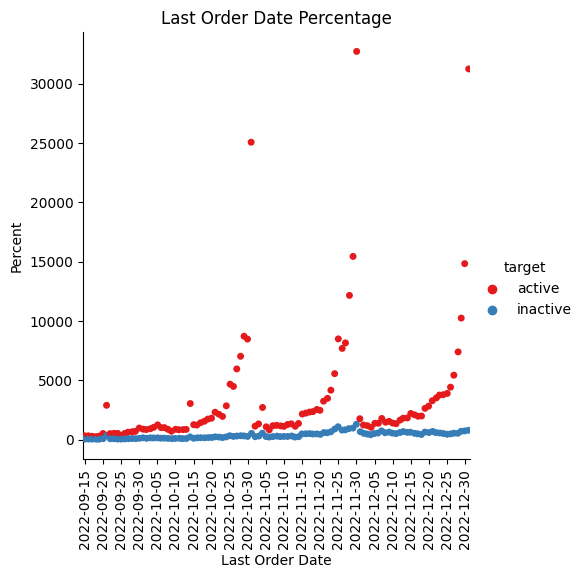

In [16]:

x,y = 'target', 'lastorder_orderdate',
ax = sns.catplot,'data',

(df

.query('year_month <202301')
 #.query("target == 'active'")
.groupby(y)[x]
.value_counts()
#.value_counts(normalize=True)
#.mul(100)
.rename('Percent')
.reset_index()

.pipe((ax), x=y,y='Percent',hue=x,palette='Set1')
 .set_xticklabels( rotation=90)
 .set(title='Last Order Date Percentage', xlabel='Last Order Date')
.ax.xaxis.set_major_locator(ticker.MultipleLocator(5))

)


## User Registrations Monthly

#### Below it is seen that there is a high number of registrations on the lauch of the app which was October 2021 and had the R1 promotion

#### Another spike October and November 2022 when there was campaign to win away a share of R1 million to 20 lucky winners between the 10 and 31 October 2022




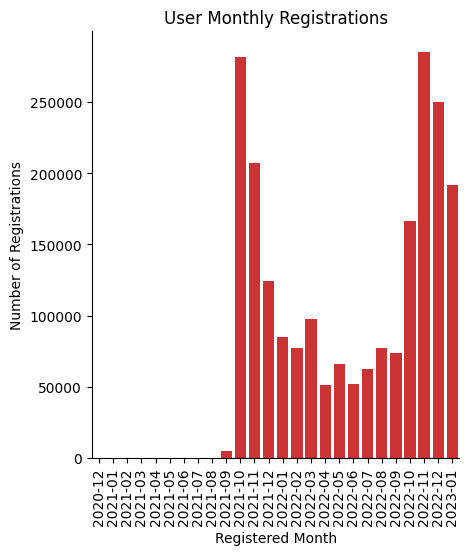

In [17]:

x,y = 'regist_month', 'hashed_user_id'
ax = sns.catplot,'data',
(df
.groupby(x)[y]
.count()
.rename('count')
.reset_index()

.pipe((ax), x=x,y='count',kind='bar',color='#e41a1c')
.set(title='User Monthly Registrations', xlabel='Registered Month', ylabel='Number of Registrations')

.set_xticklabels( rotation=90))


## User Spend Behavour

#### From the below it is clear that there is a slight correlation to registrations on app and the spenditure on the app,especially on the launch month.
###

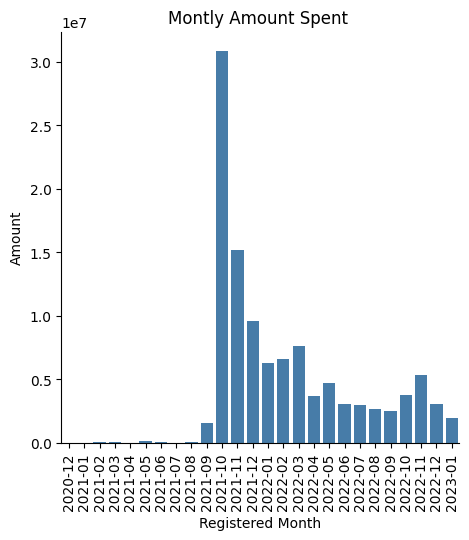

In [18]:
x,y='regist_month','subtotal_amount_recent_30days'
ax=sns.catplot,'data'
(df
.groupby(x)[y]
.sum()
.rename('sum')
.reset_index()
.pipe((ax), x=x,y='sum',kind='bar',color='#377eb8')
.set(title='Montly Amount Spent ', xlabel='Registered Month', ylabel='Amount')

.set_xticklabels( rotation=90))


# Data Preparation

What was noticed from our dataset is that the month of Jan 2023 there are no active users,only inactive users and we came to the conclusion to remove the data from our analysis.
 
Looking at the graphs below it is clear that this information can scew our predictions and data analysis




[Text(0.5, 1.0, 'Unique Pages Visited Per Month '),
 Text(0.5, 0, 'Month of Year'),
 Text(0, 0.5, 'Unique Pages Visited')]

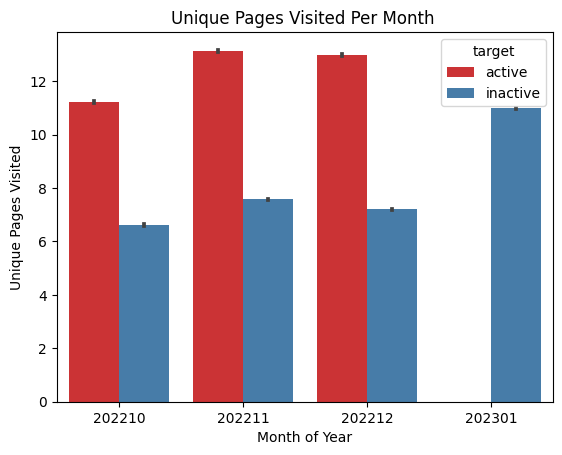

In [19]:

(
sns.barplot(data=df,x='year_month',y='nr_unique_pages_visited',hue='target',palette='Set1')
.set(title='Unique Pages Visited Per Month ', xlabel='Month of Year', ylabel='Unique Pages Visited'))


### Creating DataFrame A

#### This dataframe is created to drop unnecessary columns in our point of view and rearrange our columns

In [20]:
#Dropping columns we won't need and naming the df
df_a=df.drop(columns=['unique_app_category_visits','unique_search_terms','search_events',
                      'subtotal_ordercount_recent_7days','subtotal_amount_recent_7days',
                      'subtotal_amount_today_daily', 'subtotal_ordercount_today_daily','is_bind_card',
                      'lastorder_platform'],axis=1)
df_a.head()

,target,hashed_user_id,regist_date,lastorder_usecase,lastorder_orderdate,subtotal_amount_recent_30days,subtotal_ordercount_recent_30days,nr_interactions,nr_days_interacted,max_date_time,nr_unique_pages_visited,unique_app_visits,year_month,lastorder_month,regist_month
0,active,-1000772633524872632,2022-12-30,-1,NaT,0.0,0,15,1,2022-12-30,6,2,202212,NaT,2022-12
1,inactive,-1000772633524872632,2022-12-30,-1,NaT,0.0,0,11,2,2023-01-20,2,2,202301,NaT,2022-12
2,inactive,-1006559301419582051,2022-08-15,-1,NaT,0.0,0,4,1,2022-12-06,2,1,202212,NaT,2022-08
3,inactive,-1006671521575354929,2023-01-03,-1,NaT,0.0,0,35,1,2023-01-03,17,3,202301,NaT,2023-01
4,inactive,-1008193142447905044,2021-10-16,-1,NaT,0.0,0,158,3,2022-11-21,12,7,202211,NaT,2021-10


In [21]:
#Re-arranging columns in df
df_a = df.reindex(columns=['target','is_bind_card','hashed_user_id','regist_date','months_active','year_month',
                           'unique_app_visits','nr_days_on_app','nr_interactions',
                           'subtotal_amount_recent_30days','subtotal_ordercount_recent_30days',
                           'nr_days_interacted','max_date_time','nr_unique_pages_visited','lastorder_orderdate','lastorder_usecase'])



In [22]:
#Creating a column to look at the number of days on app
df_a['nr_days_on_app'] =(df['max_date_time'] - df['regist_date']).dt.days

In [23]:
#Creating a column to look at the months active
df_a['months_active']=df.groupby(['hashed_user_id'])['hashed_user_id'].transform('count')

In [24]:
df_a.head()

,target,is_bind_card,hashed_user_id,regist_date,months_active,year_month,unique_app_visits,nr_days_on_app,nr_interactions,subtotal_amount_recent_30days,subtotal_ordercount_recent_30days,nr_days_interacted,max_date_time,nr_unique_pages_visited,lastorder_orderdate,lastorder_usecase
0,active,0,-1000772633524872632,2022-12-30,2,202212,2,0,15,0.0,0,1,2022-12-30,6,NaT,-1
1,inactive,0,-1000772633524872632,2022-12-30,2,202301,2,21,11,0.0,0,2,2023-01-20,2,NaT,-1
2,inactive,0,-1006559301419582051,2022-08-15,1,202212,1,113,4,0.0,0,1,2022-12-06,2,NaT,-1
3,inactive,0,-1006671521575354929,2023-01-03,1,202301,3,0,35,0.0,0,1,2023-01-03,17,NaT,-1
4,inactive,1,-1008193142447905044,2021-10-16,1,202211,7,401,158,0.0,0,3,2022-11-21,12,NaT,-1


### Creating DataFrame B

#### The dataframe is created to drop data from 202301 as all users in this month are inactive

In [25]:

df_b=df_a.query('year_month <202301')
df_b.sort_values('subtotal_amount_recent_30days',ascending=False)\
.round(2)\
.head()

,target,is_bind_card,hashed_user_id,regist_date,months_active,year_month,unique_app_visits,nr_days_on_app,nr_interactions,subtotal_amount_recent_30days,subtotal_ordercount_recent_30days,nr_days_interacted,max_date_time,nr_unique_pages_visited,lastorder_orderdate,lastorder_usecase
1976646,active,1,-8999309118655251227,2021-10-12,4,202212,9,444,381,109800.23,11,14,2022-12-30,52,2022-12-29,DSTV
1976645,active,1,-8999309118655251227,2021-10-12,4,202211,5,414,342,96589.83,9,15,2022-11-30,33,2022-11-28,DSTV
1976644,active,1,-8999309118655251227,2021-10-12,4,202210,4,384,200,95339.00,6,10,2022-10-31,24,2022-10-30,DSTV
880697,active,1,3141285788806466311,2022-10-07,4,202211,2,52,117,52062.02,4,8,2022-11-28,18,2022-11-28,CSB
1470067,active,1,-8434341560974171616,2021-09-22,4,202211,7,432,216,44085.00,4,8,2022-11-28,30,2022-11-28,PPU


## Using Card

#### The number of users that spending and interacting more on the app are the ones who have binded thier card on the app

In [26]:
(df.groupby(['is_bind_card'])
.agg({'subtotal_amount_recent_30days' : ['sum'],'nr_interactions':['sum']})
[['subtotal_amount_recent_30days','nr_interactions']].apply(lambda x: 100*x/x.sum())

)
#sns.barplot(data=df, x="is_bind_card", y="sum")
#.agg({'user_count':['mean'],'nr_days_on_app':['mean'],'nr_interactions':['mean'],'subtotal_amount_recent_30days':['mean']})


,subtotal_amount_recent_30days,nr_interactions
,sum,sum
is_bind_card,,
0,4.708993,30.525166
1,95.291007,69.474834


<Axes: title={'center': 'Binded Card'}, xlabel='Bind Card', ylabel='Percentage'>

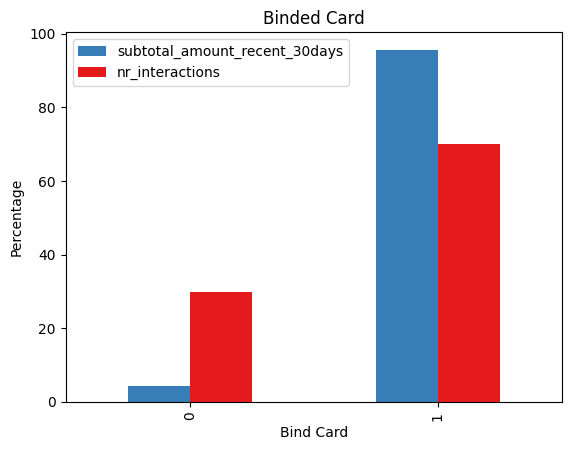

In [27]:

(df_b
 .groupby(['is_bind_card'])[['subtotal_amount_recent_30days','nr_interactions']]
.sum()
.apply(lambda x: 100*x/x.sum())  
.plot(kind='bar', ylabel='Percentage',xlabel='Bind Card',title='Binded Card',color = ['#377eb8', '#e41a1c'])
)



In [28]:

(df_b
 .groupby(['is_bind_card'])[['subtotal_amount_recent_30days','nr_interactions']]
.sum()
.apply(lambda x: 100*x/x.sum())
#.rename('Percent')
.reset_index()         
)
#sns.barplot('data', x="is_bind_card", y='sum')
#.sum()
# .sort_values(ascending=False)
#.rename('sum')
#.reset_index()

,is_bind_card,subtotal_amount_recent_30days,nr_interactions
0,0,4.370378,29.861699
1,1,95.629622,70.138301


### Query  Active and Inactive 

In [29]:
df_active=df_b.query("target == 'active'")
df_active.sort_values('nr_days_on_app')\
.head(10)

,target,is_bind_card,hashed_user_id,regist_date,months_active,year_month,unique_app_visits,nr_days_on_app,nr_interactions,subtotal_amount_recent_30days,subtotal_ordercount_recent_30days,nr_days_interacted,max_date_time,nr_unique_pages_visited,lastorder_orderdate,lastorder_usecase
0,active,0,-1000772633524872632,2022-12-30,2,202212,2,0,15,0.0,0,1,2022-12-30,6,NaT,-1
1574125,active,0,-2411975757039312848,2022-11-30,2,202211,1,0,5,0.0,0,1,2022-11-30,3,NaT,-1
1574148,active,0,-2461071460167818998,2022-10-20,2,202210,7,0,48,0.0,0,1,2022-10-20,3,NaT,-1
1574160,active,0,-2482971335238486048,2022-12-09,2,202212,5,0,23,0.0,0,1,2022-12-09,5,NaT,-1
354935,active,0,7684002927941374636,2022-10-03,2,202210,2,0,17,0.0,0,1,2022-10-03,6,NaT,-1
354913,active,1,7648048902289367036,2022-11-22,2,202211,6,0,38,59.0,1,1,2022-11-22,12,2022-11-22,MOBILE
354891,active,0,7624776335956283495,2022-11-03,3,202211,2,0,64,0.0,0,1,2022-11-03,10,NaT,-1
354885,active,0,7619517747276587545,2022-11-19,2,202211,3,0,36,0.0,0,1,2022-11-19,13,NaT,-1
1574217,active,0,-2568450497905460894,2022-12-31,2,202212,7,0,20,0.0,0,1,2022-12-31,3,NaT,-1
354864,active,0,7599741611601255070,2022-12-01,2,202212,2,0,79,0.0,0,1,2022-12-01,14,NaT,-1


In [30]:
df_inactive=df_b.query("target == 'inactive'")
df_inactive.head()

,target,is_bind_card,hashed_user_id,regist_date,months_active,year_month,unique_app_visits,nr_days_on_app,nr_interactions,subtotal_amount_recent_30days,subtotal_ordercount_recent_30days,nr_days_interacted,max_date_time,nr_unique_pages_visited,lastorder_orderdate,lastorder_usecase
2,inactive,0,-1006559301419582051,2022-08-15,1,202212,1,113,4,0.0,0,1,2022-12-06,2,NaT,-1
4,inactive,1,-1008193142447905044,2021-10-16,1,202211,7,401,158,0.0,0,3,2022-11-21,12,NaT,-1
5,inactive,0,-1008849587519297040,2022-12-18,1,202212,2,0,11,0.0,0,1,2022-12-18,4,NaT,-1
11,inactive,1,-1025425308758786705,2021-11-21,2,202212,1,376,15,0.0,0,1,2022-12-02,8,2022-11-15,MOBILE
12,inactive,0,-1030341130419364162,2022-11-08,1,202211,2,0,18,0.0,0,1,2022-11-08,5,NaT,-1


### User activity on months

#### What we have noticed on the users that have been flagged as inactive is that the number of interactions do not grow as the months increase

#### This column (months_active) is one we created to to visualize how many months have users that are active or inactive been on the app

<Axes: xlabel='months_active', ylabel='nr_interactions'>

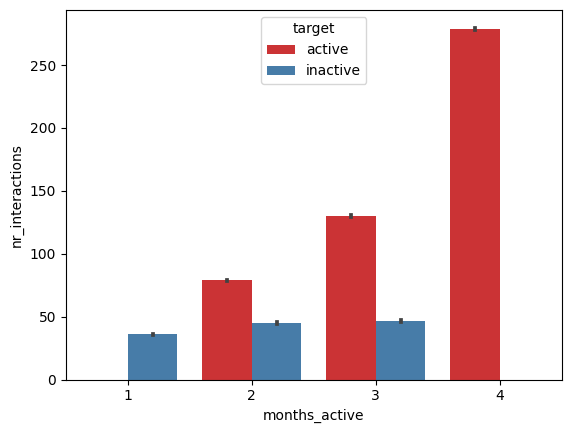

In [31]:
sns.barplot(data=df_b,x='months_active',y='nr_interactions',hue='target',palette='Set1')

The histogram below is an indication that the outlier number of interactions are caused by the Jan 2023 data all being tagged as inactive users, as compared to the 2 graphs below once we have dropped the January 2023 data the outliers have been removed from the database

array([<Axes: title={'center': 'active'}>,
       <Axes: title={'center': 'inactive'}>], dtype=object)

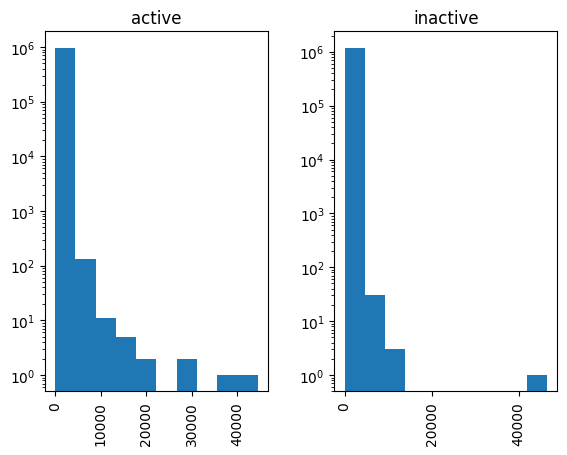

In [32]:
df['nr_interactions'].hist(by=df['target'],log=True)

array([<Axes: title={'center': 'active'}>,
       <Axes: title={'center': 'inactive'}>], dtype=object)

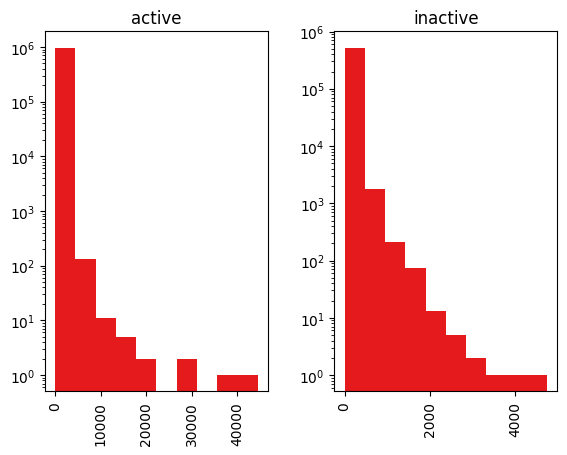

In [33]:
df_b['nr_interactions'].hist(by=df_b['target'],log=True,color='#e41a1c')

### 30 Days Order Count

In [34]:
active=df_b.query("target == 'active'")['nr_interactions'].value_counts(bins=5,normalize=True)
active

nr_interactions
(-43.41, 8882.8]      0.999977
(8882.8, 17764.6]     0.000017
(17764.6, 26646.4]    0.000002
(26646.4, 35528.2]    0.000002
(35528.2, 44410.0]    0.000002
Name: proportion, dtype: float64

In [35]:
inactive=df_b.query("target == 'inactive'")['nr_interactions'].value_counts(bins=5,normalize=True)
inactive

nr_interactions
(-3.739, 948.6]     0.999412
(948.6, 1896.2]     0.000544
(1896.2, 2843.8]    0.000034
(2843.8, 3791.4]    0.000006
(3791.4, 4739.0]    0.000004
Name: proportion, dtype: float64

#### Below it is clearly seen that the order count for recent 30 days on the inactive users is very low.The order count is less than 100 and most are not spending on the app as compared to the active users

Text(0.5, 1.0, 'Interactions')

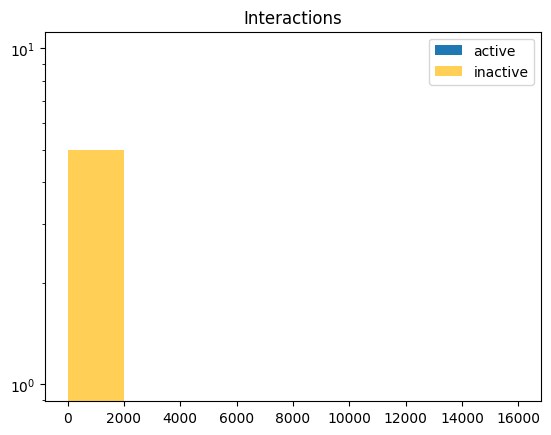

In [36]:
bins=[0,2000,4000,8000,16000]

plt.hist(active,bins=bins,log=True,label='active',alpha=1)
plt.hist(inactive,bins=bins,log=True,label='inactive',alpha=1,color='#FFCF56')
plt.legend(loc='best')
plt.title('Interactions')

### 30 Days Amount

In [37]:
seriesA=df_b.query("target == 'active'")['subtotal_amount_recent_30days'].count(normalize=True)
seriesB=df_b.query("target == 'inactive'")['subtotal_amount_recent_30days'].count(normalize=True)

TypeError: Series.count() got an unexpected keyword argument 'normalize'

In [ ]:
bins=[0,5000,10000,20000,40000,60000,100000]
plt.hist(seriesA,bins=bins,log=True,label='active',alpha=1)
plt.hist(seriesB,bins=bins,log=True,label='inactive',alpha=1,color='#FFCF56')
plt.legend(loc='best')
plt.title('30 Days Amount')

# Model Building

In [ ]:
df_b.groupby(['target'])\
.agg({'unique_app_visits':['mean'],'months_active':['mean'],'nr_days_on_app':['mean'],'nr_interactions':['mean'],'subtotal_amount_recent_30days':['mean']})

In [ ]:
df_b.head()

In [ ]:
df_b.columns

In [47]:
df_c=df_b.drop(columns=[ 'hashed_user_id', 'subtotal_ordercount_recent_30days','regist_date',
                        'year_month','max_date_time','nr_unique_pages_visited', 'unique_app_visits', 'nr_days_on_app','lastorder_usecase'],axis=1)


df_c.head()

,target,is_bind_card,months_active,nr_interactions,subtotal_amount_recent_30days,nr_days_interacted,lastorder_orderdate
0,active,0,2,15,0.0,1,NaT
2,inactive,0,1,4,0.0,1,NaT
4,inactive,1,1,158,0.0,3,NaT
5,inactive,0,1,11,0.0,1,NaT
6,active,1,4,393,41.0,17,2022-10-19


In [48]:
df_c['target'] = df_c['target'].map({'active': 1, 'inactive': 0})  

In [49]:
df_c.head()

,target,is_bind_card,months_active,nr_interactions,subtotal_amount_recent_30days,nr_days_interacted,lastorder_orderdate
0,1,0,2,15,0.0,1,NaT
2,0,0,1,4,0.0,1,NaT
4,0,1,1,158,0.0,3,NaT
5,0,0,1,11,0.0,1,NaT
6,1,1,4,393,41.0,17,2022-10-19


In [50]:
df_c.corr()['target']

#plot data for presentation slide 12

target                           1.000000
is_bind_card                     0.322269
months_active                    0.766647
nr_interactions                  0.261057
subtotal_amount_recent_30days    0.112878
nr_days_interacted               0.371407
lastorder_orderdate              0.322908
Name: target, dtype: float64

In [ ]:
df_c.corr()['target']

sns.heatmap(df_c.corr())

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X=df_c.drop(columns=['target'])
y=df_c['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=DecisionTreeClassifier()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
score=accuracy_score(y_test,predictions)
score

In [ ]:
### Classification report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

rfc_predict_test = (model.predict_proba(X_test[X.columns])[:,1] >= 0.288).astype(bool)
rfc_cv_score = cross_val_score(model, X_test[X.columns], y_test, cv=5, scoring='roc_auc')

print("=== Confusion Matrix : Test ===")
print(confusion_matrix(y_test, rfc_predict_test))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict_test))
print('\n')

In [ ]:
plt.figure(figsize=(24, 10))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(X_test.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
# ### ROC
from sklearn.metrics import plot_roc_curve


fig = plot_roc_curve( model, X, y, name="train")
fig = plot_roc_curve( model, X_test, y_test, ax = fig.ax_, name="test")
#fig = plot_roc_curve( logRegModel, X_test_oot, y_test_oot, ax = fig.ax_, name="OOT Dates / name")
fig.figure_.suptitle("ROC curve comparison")
plt.show()

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.svm import SVC

svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=svc_disp.ax_)

In [ ]:
>>> import matplotlib.pyplot as plt
>>> from sklearn import datasets, metrics, model_selection, svm
>>> X, y = datasets.make_classification(random_state=0)
>>> X_train, X_test, y_train, y_test = model_selection.train_test_split(
...     X, y, random_state=0)
>>> clf = svm.SVC(random_state=0)
>>> clf.fit(X_train, y_train)
SVC(random_state=0)
>>> metrics.plot_roc_curve(clf, X_test, y_test) 
>>> plt.show()

# Conclusion

#### We can assume that the machine learning build was a success looking at the output of 90 percent